In [1]:
from qiskit import*
from math import*
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram, plot_bloch_multivector
sim = Aer.get_backend('aer_simulator')
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi

In [2]:
# Protocol Using Maximally Entangled States

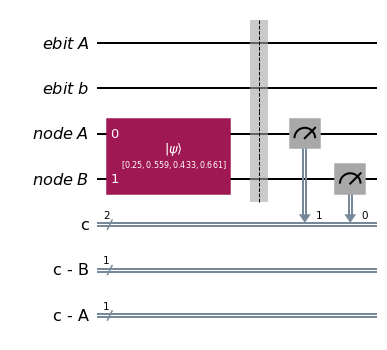

In [3]:
#Lets first define the qubits 
q1 = QuantumRegister(1,'ebit A')
q2 = QuantumRegister(1,'ebit b')
q3 = QuantumRegister(1,'node A')
q4 = QuantumRegister(1,'node B')

c1 = ClassicalRegister(1,'c - B')
c2 = ClassicalRegister(1,'c - A')

qc = QuantumCircuit(0, 2)
qc.add_register(c1)
qc.add_register(c2)
qc.add_register(q1)
qc.add_register(q2)
qc.add_register(q3)
qc.add_register(q4)

#Define the initial state of the system
initial_state = 1/sqrt(16)*np.array([sqrt(1),sqrt(5),sqrt(3),sqrt(7)])
qc.initialize(initial_state, [2,3])

qc.save_statevector()

#Validating the initial states
qc.measure([2,3],[1,0])

qc.draw(output='mpl',style = 'iqx')#.savefig('cnot-circ-mes.svg',dpi=600)

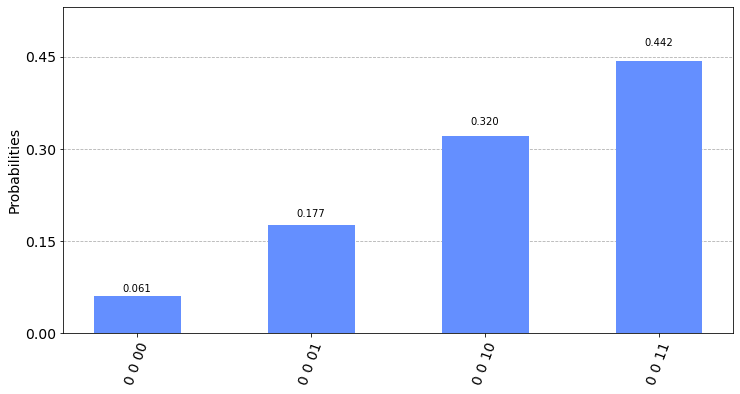

In [4]:
#Run the circuit
qobj = assemble(qc) 
counts = sim.run(qobj).result().get_counts() 
plot_histogram(counts,figsize=(12,6))

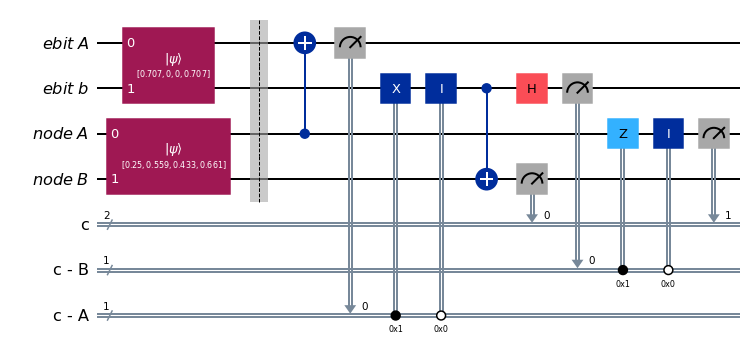

In [7]:
#Setting up the protocol to implement CNOT btw Node A and Node B

#Lets first define the qubits 
q1 = QuantumRegister(1,'ebit A')
q2 = QuantumRegister(1,'ebit b')
q3 = QuantumRegister(1,'node A')
q4 = QuantumRegister(1,'node B')

c1 = ClassicalRegister(1,'c - B')
c2 = ClassicalRegister(1,'c - A')

qc = QuantumCircuit(0, 2)
qc.add_register(c1)
qc.add_register(c2)
qc.add_register(q1)
qc.add_register(q2)
qc.add_register(q3)
qc.add_register(q4)

#Define the initial state of the system
initial_state = 1/sqrt(16)*np.array([sqrt(1),sqrt(5),sqrt(3),sqrt(7)])
qc.initialize(initial_state, [2,3])

# Making Maximally entangled states
a = 1
initial = (1/sqrt(1+(a*a)))*np.array([1,0,0,a])
qc.initialize(initial,[0,1])
qc.save_statevector()

# CNOT btwn A1 and A
qc.cx(2,0)

# Measuring A in Z-basis
qc.measure(0,c2)
qc.x(1).c_if(c2, 1)
qc.id(1).c_if(c2, 0)

# CNOT btwn B and B1
qc.cx(1, 3)

# Measuring B in X-basis after hadamarding
qc.h(1)
qc.measure(1,c1)
qc.z(2).c_if(c1, 1)
qc.id(2).c_if(c1, 0)

qc.measure([2,3],[1,0])

qc.draw(output='mpl',style = 'iqx')#.savefig('cnot-circ-mes.svg',dpi=600)

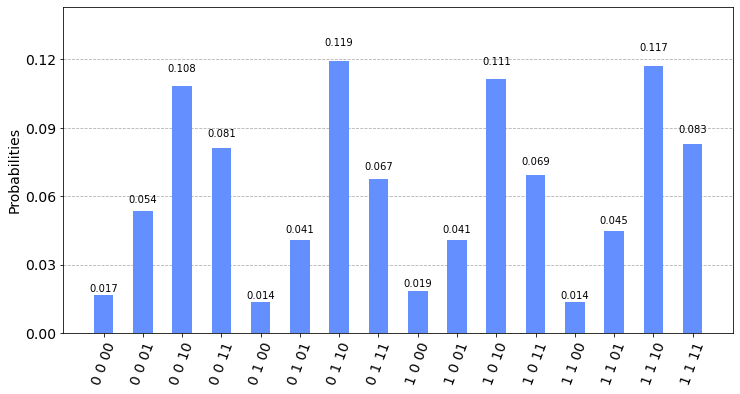

In [8]:
#Run the circuit
qobj = assemble(qc) 
counts = sim.run(qobj).result().get_counts() 
plot_histogram(counts,figsize=(12,6))

In [9]:
# Protocol Using Non-maximally Entangled States

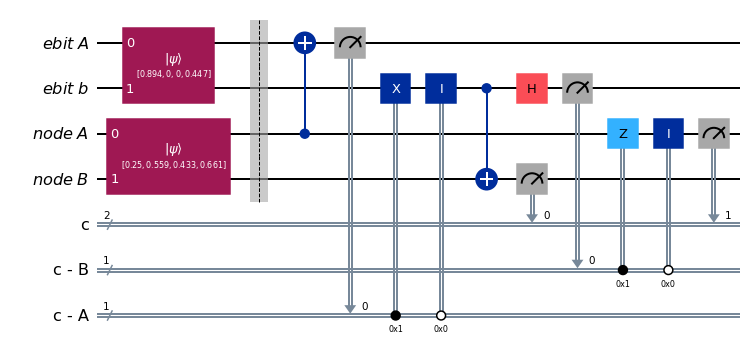

In [10]:

#Lets first define the qubits 
q1 = QuantumRegister(1,'ebit A')
q2 = QuantumRegister(1,'ebit b')
q3 = QuantumRegister(1,'node A')
q4 = QuantumRegister(1,'node B')

#The classical registers to store the info of entangled bits after measuring them
c1 = ClassicalRegister(1,'c - B')
c2 = ClassicalRegister(1,'c - A')

#The quantum circuit
qc = QuantumCircuit(0, 2)
qc.add_register(c1)
qc.add_register(c2)
qc.add_register(q1)
qc.add_register(q2)
qc.add_register(q3)
qc.add_register(q4)

#Define the initial state of the system
initial_state = 1/sqrt(16)*np.array([sqrt(1),sqrt(5),sqrt(3),sqrt(7)])
qc.initialize(initial_state, [2,3])

# Making Non-maximally entangled states
a = 0.5 #this is the degree of entanglement which can be altered accordingly
initial = (1/sqrt(1+(a*a)))*np.array([1,0,0,a])
qc.initialize(initial,[0,1])
qc.save_statevector()

# CNOT btwn A1 and A
qc.cx(2,0)

# Measuring A in Z-basis
qc.measure(0,c2)
qc.x(1).c_if(c2, 1)
qc.id(1).c_if(c2, 0)

# CNOT btwn B and B1
qc.cx(1, 3)

# Measuring B in X-basis after hadamarding
qc.h(1)
qc.measure(1,c1)
qc.z(2).c_if(c1, 1)
qc.id(2).c_if(c1, 0)

qc.measure([2,3],[1,0])

qc.draw(output='mpl',style = 'iqx')#.savefig('cnot-circ-nmes.svg',dpi=600)

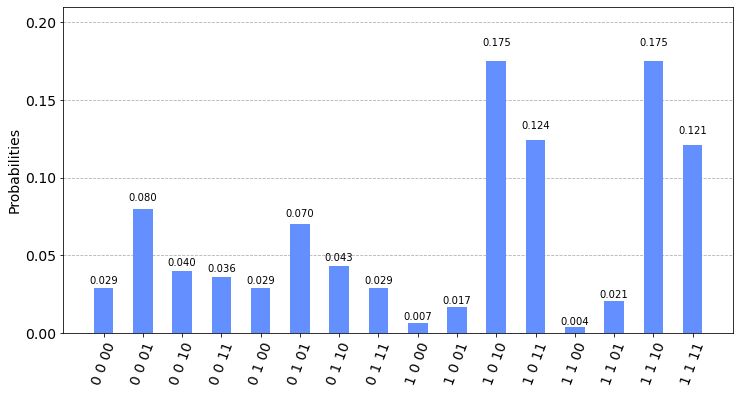

In [11]:
#Run the circuit
qobj = assemble(qc) 
counts = sim.run(qobj).result().get_counts() 
plot_histogram(counts,figsize=(12,6))